# **VIRTUAL INTERNSHIP EXPERIENCE - KPMG**
---

## Task 2 - Data Insights

📑 **Objective** :
- Recommend which of these 1000 new customers should be targeted to drive the most value for the organisation using the existing 3 datasets (Customer demographic, customer address and transactions)

<br>

# **LOAD DATASET**
---

In [1]:
# import dataset
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data set that has been cleaned
data_demo = pd.read_csv('CustomerDemographic_CLEAN.csv')
data_addr = pd.read_csv('CustomerAddress_CLEAN.csv')
data_tran = pd.read_csv('Transaction_CLEAN.csv')

# **DATA CLEANING**
---

## **1. Customer Demographic**

In [3]:
data_demo.sample(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
2094,2096,Torrie,Smartman,Female,74,1969-05-21,Programmer III,Telecommunications,High Net Worth,No,Yes,12,53
1608,1610,Valaree,Chisolm,Female,75,1955-02-10,Structural Engineer,Property,High Net Worth,No,Yes,9,67


In [4]:
# remove irrelevant columns for analysis in customer demographic 
data_demo1 = data_demo.copy()
data_demo1.drop(columns=['DOB', 'deceased_indicator', 'first_name', 'last_name'], inplace=True)

In [5]:
# convert datatype customer id
data_demo1['customer_id']= data_demo1['customer_id'].astype('object')

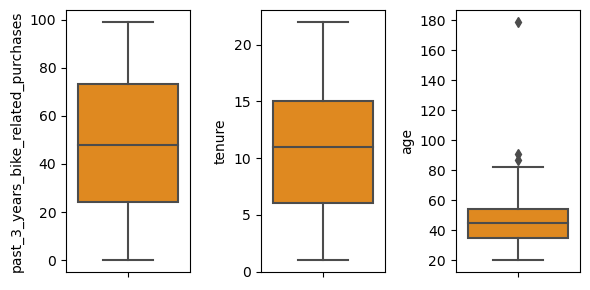

In [6]:
# check outlier
nums = data_demo1.loc[:, (data_demo1.dtypes == 'int64')].columns.tolist()
plt.figure(figsize=(6, 3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=data_demo1[nums[i]], color='darkorange', orient='v')
    plt.tight_layout()

There are outliers in the age column. 180 years old is an abnormal number for human age. So we decided to remove this extreme value using z-score.

In [7]:
# handling outlier with zscore
from scipy import stats
z_scores = np.abs(stats.zscore(data_demo1['age']))
filtered = (z_scores < 3)
data_demo1 = data_demo1[filtered]

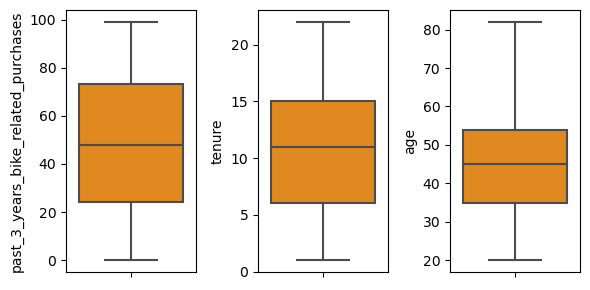

In [8]:
# after handling outlier
nums = data_demo1.loc[:, (data_demo1.dtypes == 'int64')].columns.tolist()
plt.figure(figsize=(6, 3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=data_demo1[nums[i]], color='darkorange', orient='v')
    plt.tight_layout()

To make it easier to see the age distribution for further analysis, we created an age class column.

In [9]:
# create age class
data_demo1['age_class'] = (round(data_demo['age']/ 10) * 10).astype(int)

In [10]:
data_demo1.sample(2)

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,age_class
3604,3606,Female,52,Graphic Designer,Health,High Net Worth,No,15,65,60
6,7,Female,6,Senior Editor,Financial Services,Affluent Customer,Yes,11,46,50


In [11]:
data_demo1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3995 entries, 0 to 3997
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          3995 non-null   object
 1   gender                               3995 non-null   object
 2   past_3_years_bike_related_purchases  3995 non-null   int64 
 3   job_title                            3995 non-null   object
 4   job_industry_category                3995 non-null   object
 5   wealth_segment                       3995 non-null   object
 6   owns_car                             3995 non-null   object
 7   tenure                               3995 non-null   int64 
 8   age                                  3995 non-null   int64 
 9   age_class                            3995 non-null   int32 
dtypes: int32(1), int64(3), object(6)
memory usage: 327.7+ KB


## **2. Customer Address**

In [12]:
data_addr.sample(2)

,customer_id,address,postcode,state,country,property_valuation
1626,1631,9179 Sunfield Terrace,4510,QLD,Australia,2
1131,1136,92 Melvin Hill,2147,NSW,Australia,9


In [13]:
# remove irrelevant columns for analysis in customer address 
data_addr1 = data_addr.copy()
data_addr1.drop(columns=['address', 'postcode', 'country'], inplace=True)

In [14]:
# convert datatype customer id
data_addr1['customer_id']= data_addr1['customer_id'].astype('object')

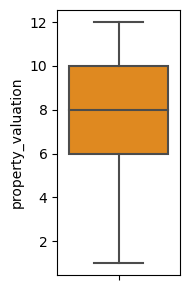

In [15]:
# check outlier
plt.figure(figsize=(2, 3))
sns.boxplot(y=data_addr1['property_valuation'], color='darkorange', orient='v')
plt.tight_layout()

In [16]:
data_addr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   state               3999 non-null   object
 2   property_valuation  3999 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 93.9+ KB


## **3. Transaction**

In [17]:
data_tran.sample(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
2071,2123,0,945,2017-06-28,True,Approved,Trek Bicycles,Standard,medium,medium,499.53,388.72,1997-10-06
16043,16507,38,3361,2017-09-04,False,Approved,Solex,Standard,medium,medium,1577.53,826.51,1991-01-23


In [18]:
data_tran[data_tran['order_status']=='Cancelled'].sample(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
5993,6141,33,3218,2017-04-06,False,Cancelled,Giant Bicycles,Standard,medium,small,1311.44,1167.18,1999-12-06
18733,19273,23,2738,2017-08-13,True,Cancelled,Norco Bicycles,Mountain,low,small,688.63,612.88,1993-10-04


In the order_status column with the Cancelled value, it can be assumed that the transaction was canceled so the company did not get revenue. We decide to delete the data record that has the Cancelled value and then we drop the column. The data retrieved is the successful transaction data.

In [19]:
# deleting rows that order status is cancelled -> not generate revenue
data_tran1 = data_tran.copy()
data_tran1 = data_tran1[data_tran1['order_status']!='Cancelled']

In [20]:
# remove columns order status
data_tran1.drop(columns=['order_status'], inplace=True)

Convert data types in some columns.

In [21]:
# convert to datetime
dt = ['transaction_date', 'product_first_sold_date']
data_tran1[dt] = data_tran1[dt].astype('datetime64[ns]')

In [22]:
# covert to object
ls_id = ['transaction_id', 'product_id', 'customer_id']
data_tran1[ls_id] = data_tran1[ls_id].astype('object')

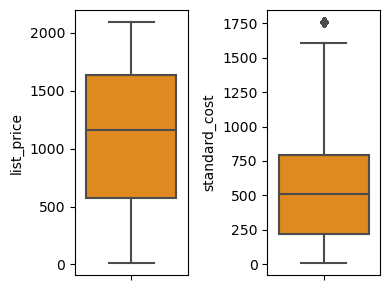

In [23]:
# check outlier
nums = ['list_price', 'standard_cost']
plt.figure(figsize=(4, 3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=data_tran1[nums[i]], color='darkorange', orient='v')
    plt.tight_layout()

In [24]:
data_tran1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19273 entries, 0 to 19444
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19273 non-null  object        
 1   product_id               19273 non-null  object        
 2   customer_id              19273 non-null  object        
 3   transaction_date         19273 non-null  datetime64[ns]
 4   online_order             19273 non-null  bool          
 5   brand                    19273 non-null  object        
 6   product_line             19273 non-null  object        
 7   product_class            19273 non-null  object        
 8   product_size             19273 non-null  object        
 9   list_price               19273 non-null  float64       
 10  standard_cost            19273 non-null  float64       
 11  product_first_sold_date  19273 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), f

## **4. Combine the Dataset Into Single Dataset**

### **4.1. Merge Demographic and Address**

In [25]:
# merge data demographic and addres
demo_addr = pd.merge(data_demo1, data_addr1, on='customer_id')
demo_addr.sample(2)

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,age_class,state,property_valuation
2737,2746,Female,97,Actuary,Financial Services,High Net Worth,Yes,7,69,70,VIC,8
1759,1768,Male,36,Programmer I,Manufacturing,High Net Worth,No,13,48,50,NSW,12


### **4.2. Merge demo_addr and Transaction**

In [26]:
data_all = pd.merge(data_tran1, demo_addr, on='customer_id')
data_all.sample(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,...,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,age_class,state,property_valuation
18353,10502,79,3122,2017-05-14,True,Solex,Touring,medium,large,2083.94,...,17,Data Coordiator,Manufacturing,High Net Worth,Yes,15,42,40,NSW,9
18913,11511,0,448,2017-03-19,True,Trek Bicycles,Standard,high,medium,495.72,...,34,Software Engineer III,IT,High Net Worth,No,3,27,30,NSW,10


### **4.3. Check Merged Dataframe**

In [27]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19214 entries, 0 to 19213
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19214 non-null  object        
 1   product_id                           19214 non-null  object        
 2   customer_id                          19214 non-null  object        
 3   transaction_date                     19214 non-null  datetime64[ns]
 4   online_order                         19214 non-null  bool          
 5   brand                                19214 non-null  object        
 6   product_line                         19214 non-null  object        
 7   product_class                        19214 non-null  object        
 8   product_size                         19214 non-null  object        
 9   list_price                           19214 non-null  float64       
 10  standard_c

# **EDA**
---

In [28]:
# making a copy of dataset for backing up
data_merged = data_all.copy()
data_merged.reset_index(inplace = True, drop = True)

In [29]:
# columns numerical
nums = ['list_price', 'standard_cost', 'past_3_years_bike_related_purchases', 'tenure', 'age', 'property_valuation']

In [30]:
# descriptive statistics
data_merged.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
list_price,19214.0,1106.69,582.94,12.01,575.27,1163.89,1635.3,2091.47
standard_cost,19214.0,555.22,405.36,7.21,215.14,507.58,795.1,1759.85
past_3_years_bike_related_purchases,19214.0,48.77,28.60,0.00,24.00,48.00,73.0,99.00
tenure,19214.0,10.66,5.68,1.00,6.00,11.00,15.0,22.00
age,19214.0,44.83,12.58,20.00,35.00,45.00,54.0,82.00
age_class,19214.0,44.57,13.10,20.00,40.00,40.00,50.0,80.00
property_valuation,19214.0,7.52,2.82,1.00,6.00,8.00,10.0,12.00


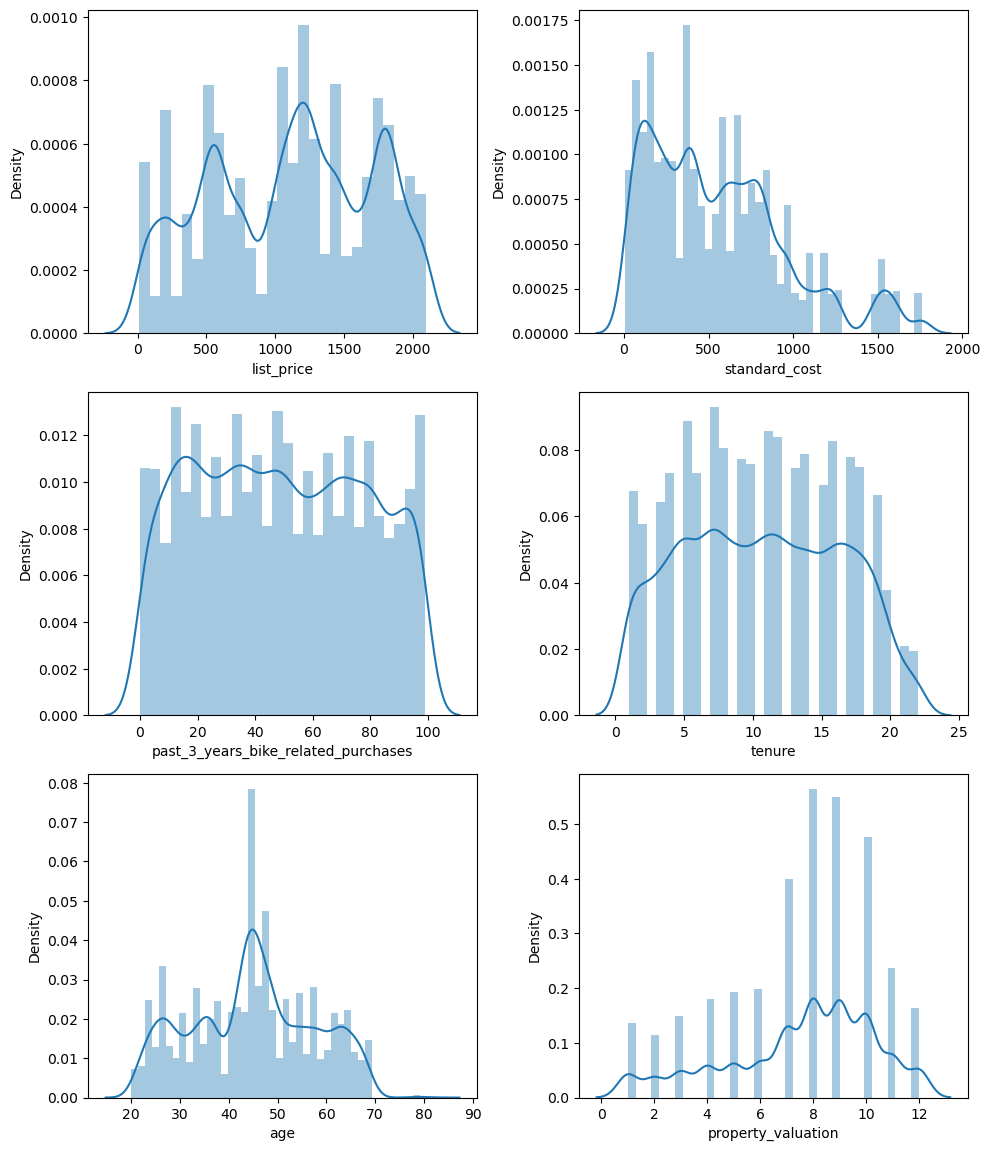

In [31]:
# distribution
plt.figure(figsize=(10, 15))
for i in range(0, len(nums)):
    plt.subplot(4, 2, i+1)
    sns.distplot(data_merged[nums[i]])
    plt.tight_layout()

- Data that tends to approach normal distribution : past_3_years_bike_related_purchases, tenure, age
- Positively skewed data (mean < median) : standard_charge, price_list, property_value

## **1. Transaction Data**

In [32]:
# making backup dataset
data_transaction = data_merged.copy()

We want to deeper analysis of datetime data by breaking it down into more specific parts.

In [33]:
# deeper analysis of datetime data by breaking it down into more specific parts
data_transaction['transaction_year'] = data_transaction['transaction_date'].dt.strftime('%Y')
data_transaction['transaction_month'] = data_transaction['transaction_date'].dt.strftime('%B')
data_transaction['transaction_quarter'] = data_transaction['transaction_date'].dt.quarter.astype(str)
data_transaction['transaction_day'] = data_transaction['transaction_date'].dt.strftime('%d')
data_transaction['transaction_weekday'] = data_transaction['transaction_date'].dt.strftime('%A')
data_transaction.drop(['transaction_date'],axis=1,inplace=True)

#### **Statistical Summary**
---

In [34]:
# descriptive statistic
data_transaction[data_transaction.columns.tolist()[22:27]].describe().T

,count,unique,top,freq
transaction_year,19214,1,2017,19214
transaction_month,19214,12,October,1705
transaction_quarter,19214,4,4,4882
transaction_day,19214,31,18,686
transaction_weekday,19214,7,Wednesday,2795


- Transaction occured in 2017
- Largest monthly transaction occur in October
- Largest quarter transaction occur fourth in quarter
- Largest daily transaction in a month usually occur on 18th
- Largest daily transaction in a week usually occur on Wednesday

#### **Number of Transaction per Month**
---

In [35]:
# aggregate by month
transaction_per_month = data_transaction.groupby(['transaction_month'])[['customer_id']].count()
transaction_per_month.reset_index(inplace=True)
transaction_per_month.columns = ['month', 'number_of_transaction']

# order by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
transaction_per_month['month'] = pd.Categorical(transaction_per_month['month'], month_order)
transaction_per_month.sort_values('month', inplace=True)
transaction_per_month

,month,number_of_transaction
4,January,1617
3,February,1571
7,March,1578
0,April,1590
8,May,1621
6,June,1513
5,July,1651
1,August,1683
11,September,1508
10,October,1705


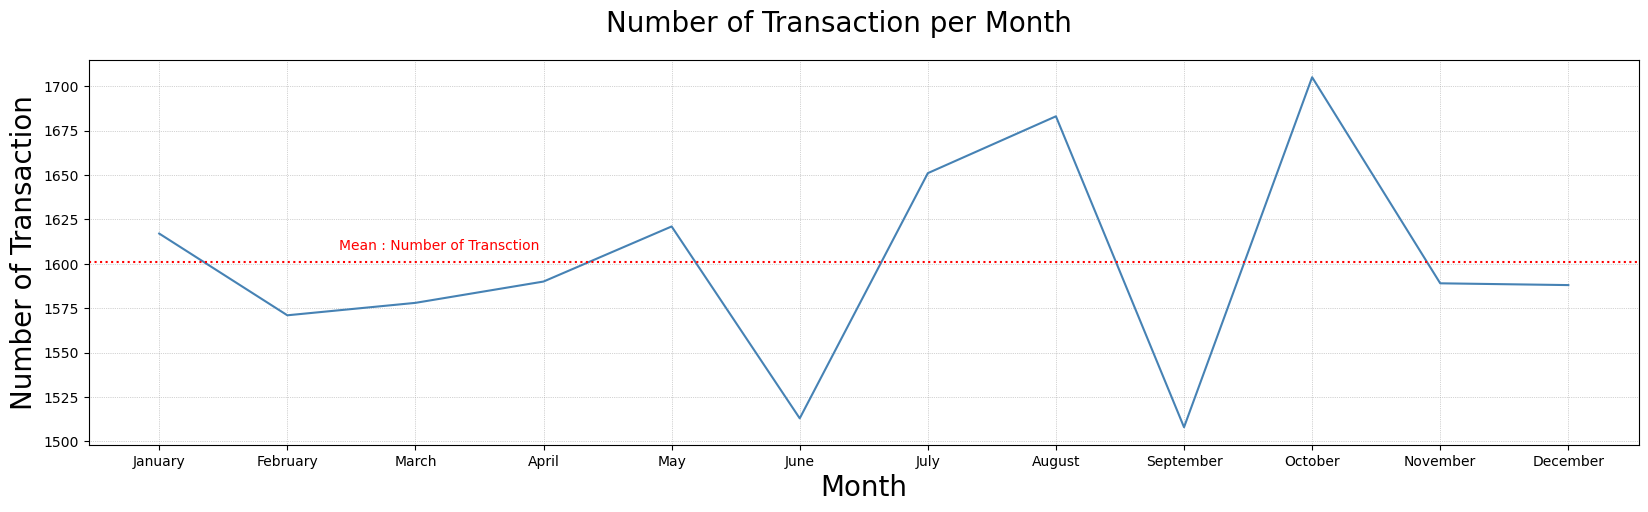

In [36]:
fig = plt.figure(figsize=(20, 5))

fig.suptitle('Number of Transaction per Month', fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Number of Transaction', fontsize=20)

x = transaction_per_month['month']
y = transaction_per_month['number_of_transaction']
mean = y.mean()

plt.plot(x, y, color = 'steelblue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.axhline(y=mean, color='red', linestyle=':')
plt.text(0.25, 0.5, 'Mean : Number of Transction', transform=fig.transFigure, color='red')
plt.show()

It can be seen that transactions decreased dramatically in June and September. In the following month after this decrease, transactions increased significantly, as seen in July and October. Further analysis can be done to dig deeper into the causes of this.

#### **Number of Transaction per Day**
---

In [37]:
month_daily_transaction = data_transaction.groupby(['transaction_month','transaction_day'])[['customer_id']].count()
month_daily_transaction.reset_index(inplace=True)
month_daily_transaction.columns = ['month','day','number_of_transaction']

month_daily_transaction['month'] = pd.Categorical(month_daily_transaction['month'], month_order)
month_daily_transaction.sort_values(['month','day'], inplace=True)
month_daily_transaction

,month,day,number_of_transaction
119,January,01,52
120,January,02,45
121,January,03,53
122,January,04,55
123,January,05,63
...,...,...,...
86,December,26,54
87,December,27,50
88,December,28,55
89,December,29,51


<AxesSubplot: xlabel='day', ylabel='month'>

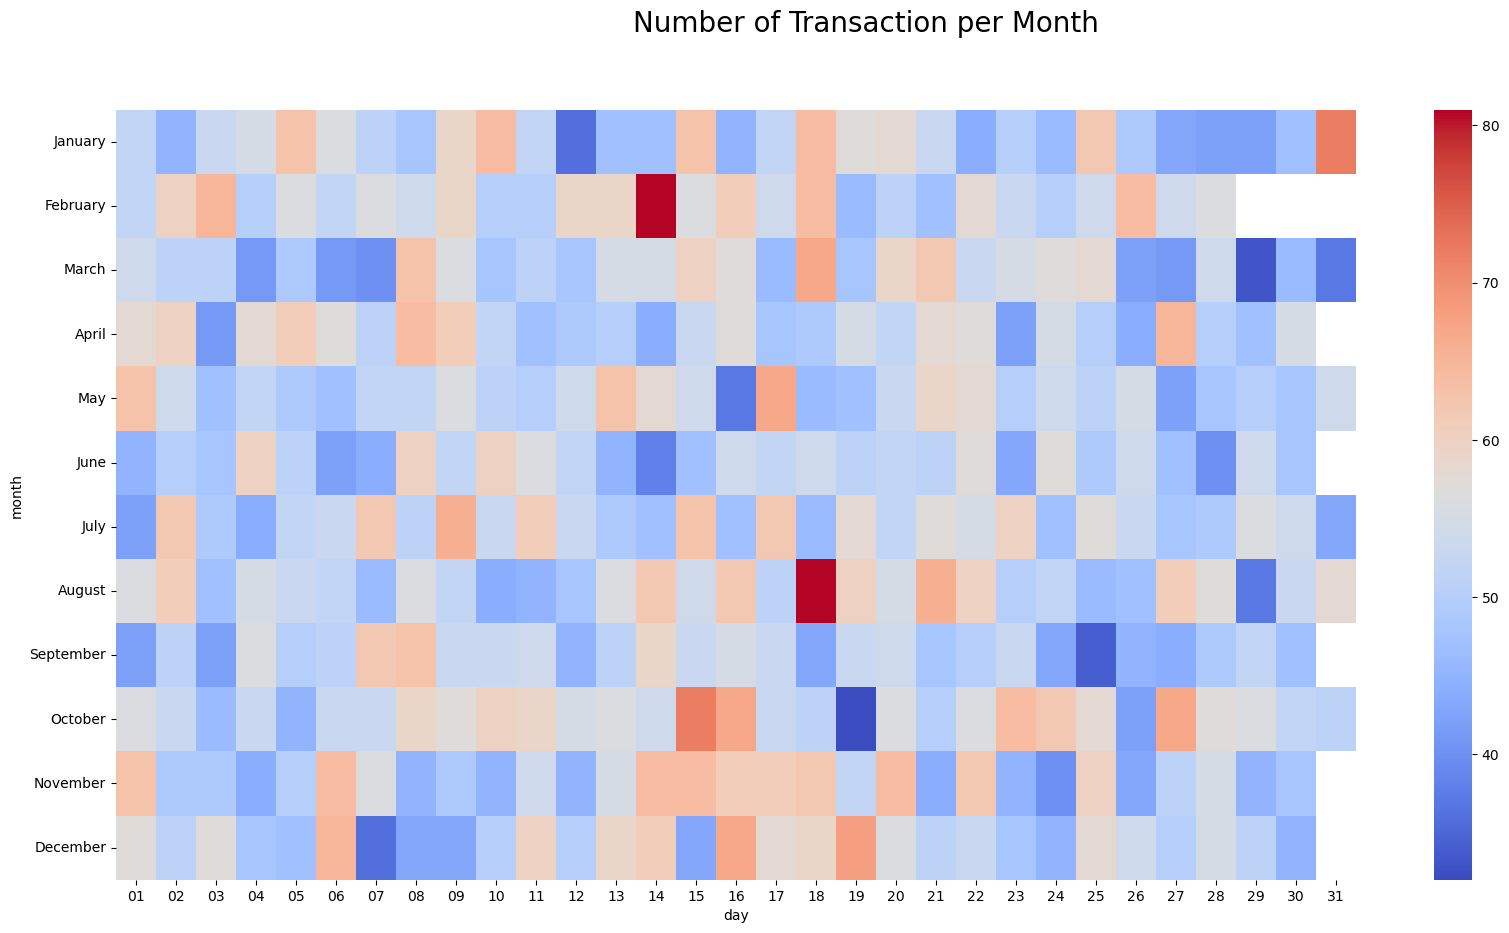

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Number of Transaction per Month', fontsize=20)
map = month_daily_transaction.pivot('month', 'day', 'number_of_transaction')
sns.heatmap(map, cmap='coolwarm')

The number of transactions per day tends to fluctuate, with significant spikes on February 14th and August 18th.

#### **Daily Transaction Trend**
---

In [39]:
daily_transaction = data_transaction.groupby(['transaction_weekday'])[['customer_id']].count()
daily_transaction.reset_index(inplace=True)
daily_transaction.columns = ['weekday','number_of_transaction']

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_transaction['weekday'] = pd.Categorical(daily_transaction['weekday'], weekday_order)
daily_transaction.sort_values('weekday', inplace=True)
daily_transaction

,weekday,number_of_transaction
1,Monday,2763
5,Tuesday,2747
6,Wednesday,2795
4,Thursday,2690
0,Friday,2693
2,Saturday,2751
3,Sunday,2775


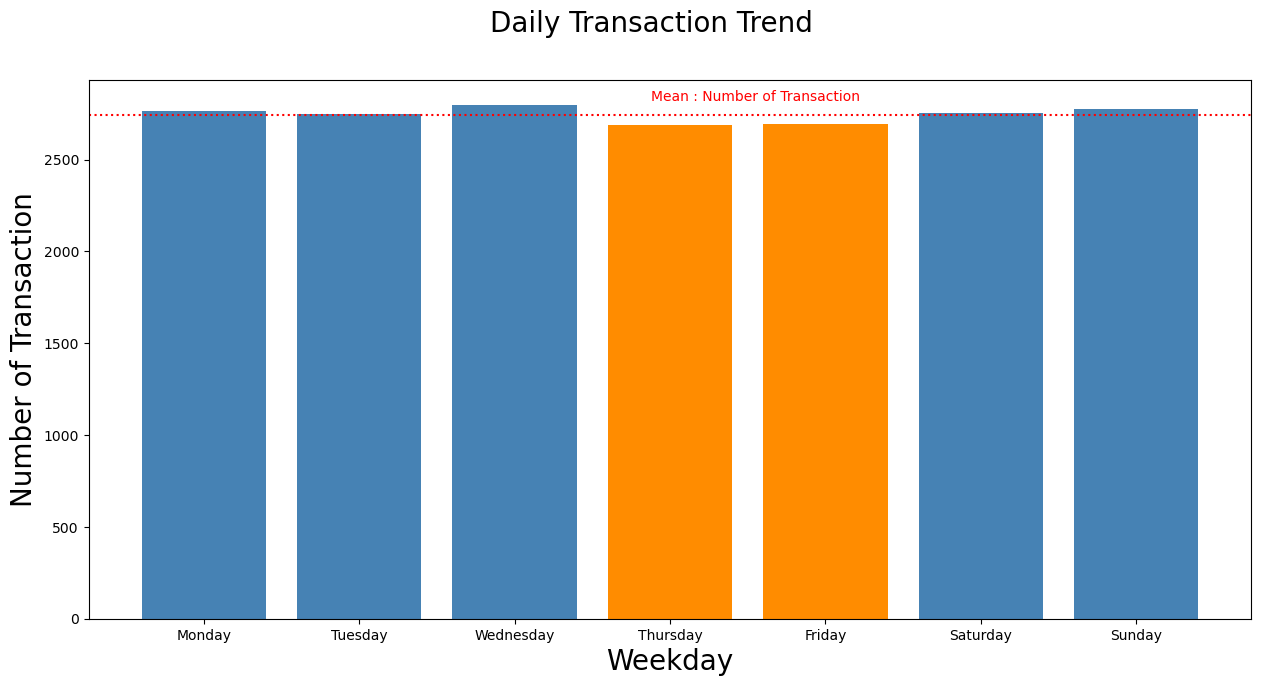

In [40]:
fig = plt.figure(figsize=(15, 7))

fig.suptitle('Daily Transaction Trend', fontsize=20)
plt.xlabel('Weekday', fontsize=20)
plt.ylabel('Number of Transaction', fontsize=20)

x = daily_transaction['weekday']
y = daily_transaction['number_of_transaction']
mean = y.mean()

colors = []
for value in daily_transaction['number_of_transaction']:
    if value < mean:
        colors.append('darkorange')
    else:
        colors.append('steelblue')

plt.bar(x, y, color=colors)
plt.axhline(y=mean, color='r', linestyle=':')
plt.text(0.5, 0.85, 'Mean : Number of Transaction', transform=fig.transFigure, color='r')
plt.show()

- Overall, the number of daily transactions is not significantly different.
- Wednesday is the busiest day.
- Thursday - Friday are above average, when it comes to the weekend there is a decrease in transactions.

## **2. Product Data**

In [41]:
data_product = data_merged.copy()

In [42]:
stat = data_product[['brand', 'product_line', 'product_class', 'product_size']].describe().T
stat['% top'] = stat['freq']/stat['count']*100
stat

,count,unique,top,freq,% top
brand,19214,6,Solex,4117,21.427084
product_line,19214,4,Standard,13755,71.588425
product_class,19214,3,medium,13420,69.844905
product_size,19214,3,medium,12620,65.681274


- The brand most purchased by customers is Solex with a percentage of 21.43%.
- The majority of customers 71.59% purchased Standard bikes.
- There are 69.84% of customers purchased a medium class bicycle.
- There are 65.68% of customers purchase a medium size bicycle.


In [43]:
# brand percentage
brand = data_cust['brand'].value_counts().reset_index()
brand.columns = ['brand', 'count']
brand['percentage'] = (brand['count']/brand['count'].sum()*100).round(2)
brand

NameError: name 'data_cust' is not defined

In [ ]:
# visualizing job industry
fig, ax = plt.subplots(figsize=(10,5))

brand_sort = brand.sort_values(by=['percentage']).reset_index(drop=True)

bars = plt.barh(y=brand_sort['brand'], width= brand_sort['percentage'])
plt.bar_label(ax.containers[0]) 
plt.title('Percentage of Brand', fontsize=16)
plt.xlabel('Brand',fontsize=12)
plt.ylabel('Percentage',fontsize=12)

#### **Percentage of Product Line with Brand Distribution**
---

In [ ]:
line = data_product.groupby(['brand', 'product_line'])['product_line'].count()
line = line.reset_index(name='count')
line['percentage'] =  (100 * line['count'] / line.groupby('brand')['count'].transform('sum')).round(2)

pvt = line.pivot_table(columns='product_line', index='brand', values=['count', 'percentage'])
pvt.fillna(0)

In [ ]:
pvt_count = line.pivot_table(index='brand', columns='product_line', values='percentage')

ax = pvt_count.plot(kind='barh', stacked=True)
plt.title('Percentage of Product Line By Brand')
plt.xticks(rotation=360)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(width, 2)), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center', fontsize=7)
    
plt.legend(bbox_to_anchor=(1.2, 0.65), fontsize=12)

#### **Percentage of Product Class with Brand Distribution**
---

In [ ]:
clas = data_product.groupby(['brand', 'product_class'])['product_class'].count()
clas = clas.reset_index(name='count')
clas['percentage'] =  (100 * clas['count'] / clas.groupby('brand')['count'].transform('sum')).round(2)

pvt = clas.pivot_table(columns='product_class', index='brand', values=['count', 'percentage'])
pvt.fillna(0)

In [ ]:
pvt_count = clas.pivot_table(index='brand', columns='product_class', values='percentage')

ax = pvt_count.plot(kind='barh', stacked=True)
plt.title('Percentage of Product Class By Brand')
plt.xticks(rotation=360)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(width, 2)), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center', fontsize=7)
    
plt.legend(bbox_to_anchor=(1.2, 0.65), fontsize=12)

#### **Percentage of Product Size with Brand Distribution**
---

In [ ]:
size = data_product.groupby(['brand', 'product_size'])['product_size'].count()
size = size.reset_index(name='count')
size['percentage'] =  (100 * size['count'] / size.groupby('brand')['count'].transform('sum')).round(2)

pvt = size.pivot_table(columns='product_size', index='brand', values=['count', 'percentage'])
pvt

In [ ]:
pvt_count = size.pivot_table(index='brand', columns='product_size', values='percentage')

ax = pvt_count.plot(kind='barh', stacked=True)
plt.title('Percentage of Product Size By Brand')
plt.xticks(rotation=360)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(width, 2)), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center', fontsize=7)
    
plt.legend(bbox_to_anchor=(1.2, 0.65), fontsize=12)

## **3. Customer Data**

In [ ]:
data_cust = data_merged.copy()

In [ ]:
stat = data_cust[['gender', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car', 'state']].describe().T
stat['% top'] = stat['freq']/stat['count']*100
stat

- There are 52.38% of customers are female.
- Customers have a variety of job titles with the top job title of 1.26% as Legal Assistants.
- There are 23.49% of customers work in the manufacturing industry.
- There are 50.26% of customers come from Mass Customers.
- There are 50.47% of customers having own car.
- The majority of customers, 53.37%, are from New South Wales.

#### **Wealth Segment**
---

In [ ]:
# wealth segment percentage
wealth = data_cust['wealth_segment'].value_counts().reset_index()
wealth.columns = ['wealth_segment', 'count']
wealth['percentage'] = (wealth['count']/wealth['count'].sum()*100).round(2)
wealth

#### **State**
---

In [ ]:
# state percentage
state = data_cust['state'].value_counts().reset_index()
state.columns = ['state', 'count']
state['percentage'] = (state['count']/state['count'].sum()*100).round(2)
state

#### **Job Industry**
---

In [ ]:
# job industry percentage
industry = data_cust['job_industry_category'].value_counts().reset_index()
industry.columns = ['job_industry', 'count']
industry['percentage'] = (industry['count']/industry['count'].sum()*100).round(2)
industry

In [ ]:
# top 10 job title
title = data_cust['job_title'].value_counts().reset_index()
title.columns = ['job_title', 'count']
title['percentage'] = (title['count']/title['count'].sum()*100).round(2)
top10title = title.head(10)
top10title

# **RFM ANALYSIS**
---

## **1. Data Preparation**

Before segmenting, we must find the recency, frequency, and monetary values. To get the recency value, we have to calculate the last purchase from the transaction_date column. And to get the monetary value, we have to create a new profit column. 

In [ ]:
data_rfm = data_merged.copy()

In [ ]:
# making last purchase column for recency
most_recent_purchase = data_rfm['transaction_date'].max()
data_rfm['last_purchase_days_ago'] = most_recent_purchase - data_rfm['transaction_date']
data_rfm['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
data_rfm['last_purchase_days_ago'] = data_rfm['last_purchase_days_ago'].astype('int64')

# making column profit for monetery
data_rfm['profit'] = data_rfm['list_price'] - data_rfm['standard_cost']

## **2. Data Aggregation**

RFM is abasic customer segmentation algorithm based on their purchasing behaviour. The behaviour is identified by using only three customer data points:
1. The recency value of each customer is obtained from the smallest recency value from the dataset.
2. The frequency value of each customer is obtained from the count of transactions they place.
3. The monetary value of each customer is obtained from the profit (list_price - standard_cost).

In [ ]:
# making rfm table
rfm_table = data_rfm.groupby('customer_id').agg({'last_purchase_days_ago': lambda x: x.min(),
                                                    'customer_id': lambda x: len(x),
                                                    'profit': lambda x: x.sum()})

rfm_table.rename(columns={'last_purchase_days_ago': 'recency', 
                          'customer_id': 'frequency', 
                          'profit': 'monetary'}, inplace=True)

In [ ]:
rfm_table

In [ ]:
# looking distribution
rfm = ['recency', 'frequency', 'monetary']

plt.figure(figsize=(8, 8))
for i in range(0, len(rfm)):
    plt.subplot(len(rfm), 1, i+1)
    sns.distplot(rfm_table[rfm[i]], color='orange')
    plt.tight_layout()

All data looks right-skewed.

## **3. Scoring**

The qcut function will calculate the score in the column according to the quartile calculation, the output is a range of 1-5. Customers get more points if they make frequent purchases, make a lot of purchases, and spend a lot of money.

In [ ]:
# Recency, if the transaction happened recently give 5 points . 
rfm_table['R_score'] = pd.qcut(rfm_table['recency'], 5, labels=[5, 4, 3, 2, 1])

# Frequency, 5 = Most frequent , 1 = rarely
rfm_table['F_score'] = pd.qcut(rfm_table['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Monetery, 5 = best, 1 = least
rfm_table['M_score'] = pd.qcut(rfm_table['monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm_table.head(5)

Calculate the overall RFM score
This step can be done in two ways:

- Concatenation: creating segments Here we just concatenate (not add) individual RFM scores like strings and get labeled segments in return. The highest is 555 and the lowest is 111.
- Addition: creates a score, here we find the average of the individual RFM scores indicating the customer's score. Highest 5 and lowest 1.

In [ ]:
# creating rfm score
rfm_table['RFM_segment'] = rfm_table['R_score'].astype(str) + rfm_table['F_score'].astype(str) + rfm_table['M_score'].astype(str)
rfm_table['RFM_score'] = ((rfm_table['R_score'].astype('int64') + rfm_table['F_score'].astype('int64') + rfm_table['M_score'].astype('int64')) / 3).round(2)

In [ ]:
rfm_table.sample(5)

## 4. **Segmentation and Score Labeling**

After calculations on the RFM data we can create customer segments:

| **Segment** | **Interpretation** |
|----|----|
| **Champions** | Bought recently, buy often and spend the most. |
| **Loyal customers**| Buy on a regular basis. Responsive to promotions. |
| **Potential loyalist** | Recent customers with average frequency. |
| **Recent customers** | Bought most recently, but not often. |
| **Promising** | Recent shoppers, but haven’t spent much. |
| **Needs attention** | Above average recency, frequency and monetary values. May not have bought very recently though. |
| **About to sleep** | Below average recency and frequency. Will lose them if not reactivated. |
| **At risk** | Some time since they’ve purchased. Need to bring them back! |
| **Can’t lose them** | Used to purchase frequently but haven’t returned for a long time. |
| **Hibernating** | Last purchase was long back and low number of orders. May be lost. |

We will use Recency and Frequency to segment our customers and determined how to segment customers using regex.

In [ ]:
# creating segment
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [ ]:
# applying segment
rfm_table['Segment'] = rfm_table['R_score'].astype(str) + rfm_table['F_score'].astype(str)
rfm_table['Segment'] = rfm_table['Segment'].replace(seg_map, regex=True)

Customer score:

| **Score** | RFM_Score |
|---|---|
| **Diamond** | 5 - 4.1 |
| **Platinum** | 4 - 3.1 |
| **Gold** | 3 - 2.1 |
| **Silver** | 2 - 1.1 |
| **Bronze** | 1 - 0 |

In [ ]:
# create labels for the scores
rfm_table['Score'] = np.where(rfm_table['RFM_score'] > 4, 'Diamond',
                              np.where(rfm_table['RFM_score'] > 3, 'Platinum',
                                       np.where(rfm_table['RFM_score'] > 2, 'Gold',
                                                np.where(rfm_table['RFM_score'] > 1, 'Silver',
                                                         'Bronze'))))

In [ ]:
rfm_table.sample(10)

## **5. Analysis**

In [ ]:
rfm_data = rfm_table.reset_index().copy()

### **5.1. Statistical Summary**

#### **Recency vs Frequency**
---

In [ ]:
data = pd.DataFrame(data=rfm_data,columns=['customer_id','Score','recency','frequency','monetary'])

# plot data with seaborn
facet = sns.scatterplot(data=data, x='recency', y='frequency', hue='Score', palette='tab10')

A high frequency is found with customers who have a recent purchase within average of two months.

#### **Monetery vs Frequency**
---

In [ ]:
# plot data with seaborn
facet = sns.scatterplot(data=data, x='monetary', y='frequency', hue='Score', palette='tab10')

Customers who buy frequently spend less money.

#### **Recency vs Frequency vs Monetary**
---

In [ ]:
# rfm_data['Score'] = rfm_data['Score'].astype(str)
import plotly.express as px

plt.figure(figsize=(20, 20))

fig = px.scatter_3d(rfm_data,x='recency', y='frequency', z='monetary',
              color='Score', opacity=0.9,color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In the above plot, the color specifies Cluster. From the above plot, we can see how the customers are spread among Recency, Frequency and Monetary dimension

#### **Score**
---

In [ ]:
# create agg dictionary
agg_dict = {'customer_id': 'count', 
            'recency': 'mean',
            'frequency': 'mean',
            'monetary': 'mean'}

In [ ]:
score_cat =['Diamond', 'Platinum', 'Gold', 'Silver', 'Bronze']
rfm_data['Score'] = pd.Categorical(rfm_data['Score'], categories = score_cat)

df_sc = rfm_data.groupby('Score').agg(agg_dict).reset_index()
df_sc.rename({'Score': 'Score', 'customer_id': 'count'}, axis=1, inplace=True)
df_sc['count %'] = (100 * df_sc['count'] / df_sc['count'].sum()).round(2)
df_sc['monetary %'] = (100 * df_sc['monetary'] / df_sc['monetary'].sum()).round(2)
df_sc

In [ ]:
# bar chart - count
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10))

ax[0].bar(x='Score', height='count %', data=df_sc, color=sns.color_palette('tab10'))
ax[1].bar(x='Score', height='monetary %', data=df_sc, color=sns.color_palette('tab10'))

ax[0].set_ylabel('')
ax[0].set_title('Percentage Customer Count by Score', fontsize=14)

ax[1].set_ylabel('')
ax[1].set_title('Percentage Customer Monetary by Score', fontsize=14)

for p in ax[0].patches:
    ax[0].annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.3))
for p in ax[1].patches:
    ax[1].annotate('{:.0f}%'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.3))

- Most of customer is Platinum with a percentage of profit contribution (monetary) of 27%.
- Customers who contribute the most to generating the highest profit are Diamond, which is 39%. However, the number of these customers is low enough which is only 17%.

#### **Segment**
---

In [ ]:
df_seg = rfm_data.groupby('Segment').agg(agg_dict).reset_index()
df_seg.rename({'Segment': 'Segment', 'customer_id': 'count'}, axis=1, inplace=True)
df_seg['count %'] = (100 * df_seg['count'] / df_seg['count'].sum()).round(2)
df_seg['monetary %'] = (100 * df_seg['monetary'] / df_seg['monetary'].sum()).round(2)
df_seg.sort_values(by='count', ascending=False, inplace=True)
df_seg

In [ ]:
import squarify
import matplotlib.pyplot as plt

for col in ['count', 'monetary']:
    labels = df_seg['Segment'] + df_seg[col + ' %'].apply(lambda x: '({0:.2f}%)'.format(x))

    fig, ax = plt.subplots(figsize=(18,8))
    squarify.plot(sizes=df_seg[col], label=labels, alpha=.8, color=sns.color_palette('Paired', len(df_seg)))
    ax.set_title('RFM Segments of Customers (%s)' % col)
    plt.axis('off')
    plt.show()

- Most of customers are in the Hibernating, Loyal Customers, and Potential Loyalist.
- Most of profit comes from the segment of Can't Loose, Champions, and Loyal Customers.

### **5.2. Interpretation**

In [ ]:
# Aggregate data by each customer
rfm1 = rfm_data.groupby(['Score','Segment'])['Segment'].count()
rfm1 = rfm1.reset_index(name='count')
rfm1['percentage'] =  (100 * rfm1['count'] / rfm1.groupby('Score')['count'].transform('sum')).round(2)
# rfm1
pvt = rfm1.pivot_table(index='Score', columns='Segment', values='percentage')
pvt

|Customer Score|%|RFM Segment|RFM Interpretation|Actionable Insight|
|---|---|---|---|---|
|Diamond|17%|50% Champions; 47% Loyal Customers|Customers who transacted recently, buy often, with a high or low amount of monetary spending. The majority of Diamond customers are Champions and Loyal Customers.| To retain champion customers, companies can reward them. And to convert Loyal Customers into Champion customers, the company should engage them more frequently, ask for reviews, or upsell higher-value products.|
|Platinum|30%|35% Loyal Customers; 27% Potential Loyalists|Customers who made their last transaction some time ago, spend a good amount and purchase more than once or often. RFM segmentation shows that 35% of them are Loyal Customers and 27% are Potential Loyalists.| Companies should offer loyalty programs with benefits like points or discounts for customers and recommend other products to them.|
|Gold|28%|32% At Risk|Customers who spend big money and purchase often but haven't purchased for a long time. RFM segmentation in Gold customer shows that majority 32% of them are At Risk|Companies should bring them back by sending personalized emails or newsletters to reconnect and offer promotions or discounts.|
|Silver|20%|66% Hibernating|Customers who made their last transaction a long time ago, and who have made few purchases. RFM segmentation shows that majority of Silver customers are Hibernating.|Offer other personalized or relevant products, and give more special discount.|
|Bronze|6%|100% Hibernating|Can identify as a lost customer. Lowest recency, frequency, and monetary scores.| Companies can revive interest with outreach campaigns or ignore them otherwise.|

## **6. Customer Target**

In [ ]:
# copy customer demographic dataset
df_customer = demo_addr.copy()

We will attach RFM and scoring labels to the customer demographics dataset and we will conduct further analysis on customer characteristics that have potential for marketing strategies.

In [ ]:
rfm_data1 = rfm_data[['customer_id', 'Score', 'Segment']].copy()

In [ ]:
# merge dataset by id customers
df_target = pd.merge(df_customer, rfm_data1, on = 'customer_id')

In [ ]:
df_target.sample(3)

We decided to focus on exploring **Diamond Customers** that generate the most profit for the company.

In [ ]:
# filtering data Diamond Customers
df_target = df_target[df_target['Score'] == 'Diamond']

In [ ]:
df_target.info()

### **6.1 Statistical Summary or Diamond Customers**

#### **Numerical Columns**
---

In [ ]:
df_target.describe().T.round(2)

In [ ]:
# looking distribution
nums =['past_3_years_bike_related_purchases', 'tenure', 'age', 'age_class', 'property_valuation']
plt.figure(figsize=(10, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.distplot(data_merged[nums[i]])
    plt.tight_layout()

#### **Categorical Columns**
---

In [ ]:
cats = ['gender', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car', 'state', 'Segment']
df_target[cats].describe().T

### **6.2. Analyzing and Viasualizing Distribution of Diamond Customers**

#### **Diamond Customers Gender**

In [ ]:
# percentage gender
gender = df_target['gender'].value_counts().reset_index()
gender.columns = ['gender', 'count']
gender['percentage'] = (gender['count']/gender['count'].sum()*100).round(2)
gender

In [ ]:
# calculating data
group = df_target.groupby(['gender'])['customer_id'].count()
group = group.reset_index(name='count')

# creating visualization
x = group.plot(kind='bar', x='gender', y='count', color=sns.color_palette('tab10'))
plt.title('Diamond Customers Gender Distribution', fontweight='bold')
plt.xticks(rotation=360)
plt.legend('')

# showing label in bars
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

From the graph, it can be seen that the difference between the number of female and male customers is not significant. We will compare gender with other variables.

In [ ]:
# calculating value
bike = df_target.groupby(['gender'])['past_3_years_bike_related_purchases'].median().reset_index(name='median_past_3_years_bike_related_purchases')
properti = df_target.groupby(['gender'])['property_valuation'].median().reset_index(name='median_property_valuation')
tenure = df_target.groupby(['gender'])['tenure'].median().reset_index(name='median_tenure')

# visualization
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=True, sharey=True)
ax1 = bike.plot(kind='bar', x='gender', y='median_past_3_years_bike_related_purchases', color=sns.color_palette('tab10'), ax=axes[0])
ax2 = properti.plot(kind='bar', x='gender', y='median_property_valuation', color=sns.color_palette('tab10'), ax=axes[1])
ax3 = tenure.plot(kind='bar', x='gender', y='median_tenure', color=sns.color_palette('tab10'), ax=axes[2])

# giving label
axes[0].bar_label(ax1.containers[0]) 
axes[1].bar_label(ax2.containers[0]) 
axes[2].bar_label(ax3.containers[0])

axes[0].legend().remove()
plt.setp(ax1.get_xticklabels() + ax2.get_xticklabels() + ax3.get_xticklabels(), rotation=360)
axes[0].set_title('Diamond Customers Gender \nvs Median Bike Related Purchases', fontweight='bold')
axes[1].set_title('Diamond Customers Gender \nvs Median Property Valuation Distributions', fontweight='bold')
axes[2].set_title('Diamond Customers Gender \nvs Median Tenure Distributions', fontweight='bold')

This information shows that gender has little effect on Diamond's customer indicators.

#### **Diamond Customers Gender with Age**
---

In [ ]:
# percentage age
age = df_target['age_class'].value_counts().reset_index()
age.columns = ['age_class', 'count']
age['percentage'] = (age['count']/age['count'].sum()*100).round(2)
age

In [ ]:
# calculating data
group = df_target.groupby(['age_class', 'gender'])['customer_id'].count()
group = group.reset_index(name='count')
pvt = group.pivot_table(index='age_class', columns='gender', values='count')

# creating visualization
ax = pvt.plot(kind='bar', stacked=True)
plt.title('Diamond Customer Gender with Age Distribution', fontweight='bold')
plt.xticks(rotation=360)

# showing label in bars
for p in ax.patches:
    left, bottom, width, height =  p.get_bbox().bounds
    if height > 0 :
        ax.annotate("{0:.0f}".format(height), xy=(left+width/2, bottom+height/2), ha='center', va='center', color='w')

Most customers are in the age class 40 - 50, it can be interpreted that the highest frequency of Diamond customers in the age range 36 - 55. From this graph it can also be seen that gender has an almost equal distribution.

#### **Diamond Customers Wealth Segment with Age**
---

In [ ]:
# percentage wealth
wealth = df_target['wealth_segment'].value_counts().reset_index()
wealth.columns = ['wealth_segment', 'count']
wealth['percentage'] = (wealth['count']/wealth['count'].sum()*100).round(2)
wealth

In [ ]:
# calculating data
group = df_target.groupby(['age_class', 'wealth_segment'])['customer_id'].count()
group = group.reset_index(name='count')
pvt = group.pivot_table(index='age_class', columns='wealth_segment', values='count')

# creating visualization
ax = pvt.plot(kind='bar', stacked=True)
plt.title('Diamond Customer Wealth Segment with Age Distribution', fontweight='bold')
plt.xticks(rotation=360)

# showing label in bars
for p in ax.patches:
    left, bottom, width, height =  p.get_bbox().bounds
    if height > 0 :
        ax.annotate("{0:.0f}".format(height), xy=(left+width/2, bottom+height/2), ha='center', va='center', color='w')

The mass customer segment still has a high value in the 40-50 age class.

#### **Diamond Customers State**
---

In [ ]:
# percentage state
state = df_target['state'].value_counts().reset_index()
state.columns = ['state', 'count']
state['percentage'] = (state['count']/state['count'].sum()*100).round(2)
state

In [ ]:
# calculating data
group = df_target.groupby(['state'])['customer_id'].count()
group = group.reset_index(name='count')

# creating visualization
x = group.plot(kind='bar', x='state', y='count', color=sns.color_palette('tab10'))
plt.title('Diamond Customers State Distribution', fontweight='bold')
plt.xticks(rotation=360)
plt.legend('')

# showing label in bars
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

The majority of Diamond customers are from New South Wales.

#### **Diamond Customers State with Wealth Segment**
---

In [ ]:
# calculating data
group = df_target.groupby(['wealth_segment', 'state'])['customer_id'].count()
group = group.reset_index(name='count')
pvt = group.pivot_table(columns='state', index='wealth_segment', values='count')

# creating visualization
ax = pvt.plot(kind='bar', stacked=True)
plt.title('Diamond Customers State with Wealth Segment Distribution', fontweight='bold')
plt.xticks(rotation=360)

# showing label in bars
for p in ax.patches:
    left, bottom, width, height =  p.get_bbox().bounds
    if height > 0 :
        ax.annotate("{0:.0f}".format(height), xy=(left+width/2, bottom+height/2), ha='center', va='center', color='w')

Most of the customers come from Mass Customers, which is twice as much as the total Affluent Customers/High Net Worth. From this graph it can also be seen that NSW also still has a high value.

#### **Diamond Customers Job Industry**

In [ ]:
# percentage state
industry = df_target['job_industry_category'].value_counts().reset_index()
industry.columns = ['job_industry_category', 'count']
industry['percentage'] = (industry['count']/state['count'].sum()*100).round(2)
industry

In [ ]:
# calculating data
indust = df_target['job_industry_category'].value_counts().reset_index()
indust.columns = ['job_industry', 'count']

# visualizing job industry
fig, ax = plt.subplots(figsize=(10,5))

indust_sort = indust.sort_values(by=['count']).reset_index(drop=True)
bars = plt.barh(y=indust_sort['job_industry'], width= indust_sort['count'])
plt.bar_label(ax.containers[0]) 
plt.title('Platinum Customer Job Industry Distributions', fontweight='bold')
plt.xlabel('count',fontsize=12)
plt.ylabel('Percentage',fontsize=12)

Most of Diamond customers are in manufacturing, financial services, and health industry.

#### **Diamond Customers Property Valuation**

In [ ]:
# calculating data
group = df_target.groupby(['property_valuation'])['customer_id'].count()
group = group.reset_index(name='count')

# creating visualization
x = group.plot(kind='bar', x='property_valuation', y='count')
plt.title('Diamond Customers Property Valuation Distribution', fontweight='bold')
plt.xticks(rotation=360)
plt.legend('')

# showing label in bars
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

Most Diamond customers have property valuation in range 7 - 10.

### **6.3. Conclusion**

Using the information that we got in theanalysis, we can filter the target customer. They are :
- Aged between 35 - 55.
- Work in  manufacture, financial services, or health industry.
- Classified as mass customer
- Live in New South Wales
- Have property valuation at 7-10 range

Next, we will analyze 1000 customer data that has been provided by the company based on the potential customer characteristics that we have found.